# Customer Segmentation Project
Outline:
- Data Collection (importing the dataset)
- Data Preprocessing (cleaning and transforming the Dataset)
- Feature Selection (Understanding the Relevant Features)
- Clustering Model (Applying Clustering Algorithms like K-means, DBSCAN, etc.)
- Model Evaluation (evaluate the Clustering results)
- Segments profiling (Analyse and interpret the clusters)

## Data Collection

In [2]:
# importing the necessary libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# importing the data
df = pd.read_csv('shopping_behavior_updated.csv')

In [4]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [5]:
df.shape

(3900, 18)

**the dataset has 3900 customer records and 18 Features**

## Data Preprocessing

### Data Cleaning

In [6]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [8]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [9]:
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

**As we can see the Dataset has 0 null values**

### Data Transformation

In [10]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [11]:
#irrelevant features
irrelevant_features = ['Size','Color','Shipping Type','Discount Applied','Promo Code Used','Payment Method']

In [12]:
#Dropping the irrelevant features
df = df.drop(irrelevant_features,axis = 1)

In [13]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Season,Review Rating,Subscription Status,Previous Purchases,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,Winter,3.1,Yes,14,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,Winter,3.1,Yes,2,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,Spring,3.1,Yes,23,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,Spring,3.5,Yes,49,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,Spring,2.7,Yes,31,Annually


In [14]:
df['Frequency of Purchases'].nunique()

7

### Feature Engineering

In [15]:
# Feature Engineering
# Categorizing Age into groups
bins = [0, 18, 30, 50, 100]  # Define age ranges
labels = ['Teen', 'Young', 'Adult', 'Senior']  # Corresponding group names
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Categorizing purchase amount into spending category
bins_amount = [0,30 ,70 , 100]  # Define purchase amount ranges
labels_amount = ['Low', 'Medium', 'High']
df['Spending Category'] = pd.cut(df['Purchase Amount (USD)'], bins=bins_amount, labels=labels_amount)

**New Numerical Features**
- Age Group:- (0-18) Teen, (19-30) Young, (31-50) Adult, (51-100) Senior
- Spending Categories:- (0-30) Low, (31-70) Medium, (71-100) High

In [101]:
#converting categorical features into numerical representation
# Using Label Encoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender_encoded'] = le.fit_transform(df['Gender'])
df['Age Group_encoded'] = le.fit_transform(df['Age Group'])
df['Spending Category_encoded'] = le.fit_transform(df['Spending Category'])

In [17]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Season,Review Rating,Subscription Status,Previous Purchases,Frequency of Purchases,Age Group,Spending Category,Gender_encoded,Age Group_encoded,Spending Category_encoded
0,1,55,Male,Blouse,Clothing,53,Kentucky,Winter,3.1,Yes,14,Fortnightly,Senior,Medium,1,1,2
1,2,19,Male,Sweater,Clothing,64,Maine,Winter,3.1,Yes,2,Fortnightly,Young,Medium,1,3,2
2,3,50,Male,Jeans,Clothing,73,Massachusetts,Spring,3.1,Yes,23,Weekly,Adult,High,1,0,0
3,4,21,Male,Sandals,Footwear,90,Rhode Island,Spring,3.5,Yes,49,Weekly,Young,High,1,3,0
4,5,45,Male,Blouse,Clothing,49,Oregon,Spring,2.7,Yes,31,Annually,Adult,Medium,1,0,2


<Axes: >

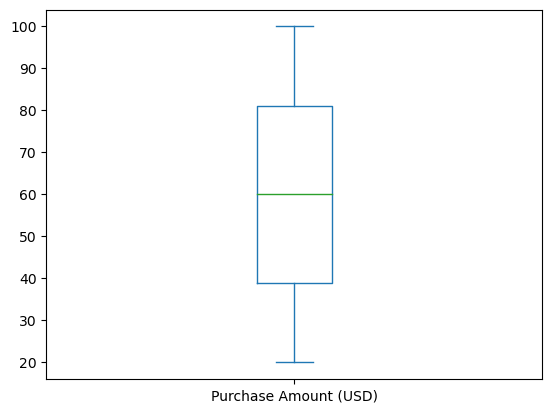

In [18]:
#some EDA
df['Purchase Amount (USD)'].plot(kind = 'box')

<Axes: >

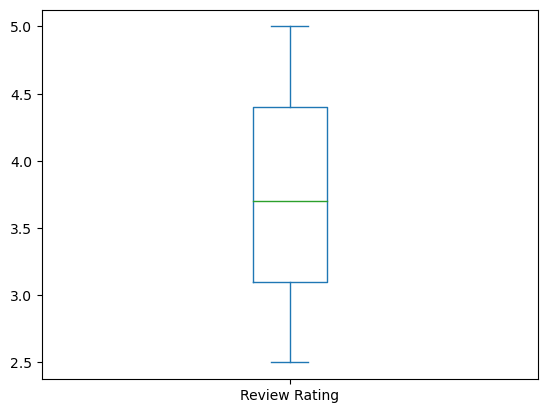

In [19]:
df['Review Rating'].plot(kind = 'box')

In [20]:
df['Previous Purchases'].unique()

array([14,  2, 23, 49, 31, 19,  8,  4, 26, 10, 37, 34, 44, 36, 17, 46, 50,
       22, 32, 40, 16, 13,  7, 41, 45, 38, 48, 18, 15, 25, 39, 35, 29, 21,
       43,  3,  5, 24, 42, 47, 28, 20, 33,  1,  9, 12, 27, 11, 30,  6],
      dtype=int64)

In [21]:
# doing one-hot encoding for non-ordinal features
df_encoded = pd.get_dummies(df, columns=['Location', 'Item Purchased', 'Frequency of Purchases', 'Category', 'Season'], drop_first=True)


## Feature Selection

In [22]:
X = df_encoded.drop(columns = ['Customer ID', 'Age', 'Gender', 'Purchase Amount (USD)',
                               'Review Rating', 'Subscription Status', 'Previous Purchases',
                               'Age Group', 'Spending Category'])

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
X_scaled

array([[ 0.68599434, -0.07991096,  0.96087924, ..., -0.58682537,
        -0.56945451,  1.73680104],
       [ 0.68599434,  1.68083902,  0.96087924, ..., -0.58682537,
        -0.56945451,  1.73680104],
       [ 0.68599434, -0.96028595, -1.2146964 , ...,  1.70408448,
        -0.56945451, -0.57577119],
       ...,
       [-1.45773797, -0.96028595,  0.96087924, ...,  1.70408448,
        -0.56945451, -0.57577119],
       [-1.45773797, -0.96028595, -1.2146964 , ..., -0.58682537,
         1.75606652, -0.57577119],
       [-1.45773797, -0.07991096, -1.2146964 , ...,  1.70408448,
        -0.56945451, -0.57577119]])

**As we can see there are a lot of features on which the model will get trained, so to reduce the no. of features we will use the dimensionality reduction**

*Reasons to Dimensionality Reduction*

- Reduce Complexity
- Avoid the curse of Dimensionality. For Details click here: "https://en.wikipedia.org/wiki/Curse_of_dimensionality"
- Improves visualisation
- Noise Reduction
- Faster Computation

**We are using Principle Component Analysis (PCA) for Dimensionality Reduction**

In [58]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) 
X_pca = pca.fit_transform(X_scaled)


## Clustering Model 

In [59]:
from sklearn.cluster import KMeans

In [60]:
kmeans = KMeans(n_clusters=3,random_state=42) 
kmeans.fit(X_pca)

F:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [61]:
df['Cluster'] = kmeans.labels_

In [62]:
df['Cluster'].unique()

array([0, 1, 2])

In [63]:
kmeans_labels = kmeans.labels_

## Model Evaluation

In [64]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X_pca, kmeans_labels)
print(f'Silhouette Score: {sil_score}')


Silhouette Score: 0.757493417869079


### Finding the optimal number of Clusters

In [33]:
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    score = silhouette_score(X_pca, kmeans.labels_)
    print(f"Silhouette score for {k} clusters: {score}")

F:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 2 clusters: 0.6781181055900009


F:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 3 clusters: 0.75775789595351


F:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 4 clusters: 0.8799363512285863


F:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 5 clusters: 0.6544736865986653


F:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 6 clusters: 0.49396080037654394


F:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 7 clusters: 0.4903305863457664


F:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 8 clusters: 0.4866402965257262


F:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 9 clusters: 0.3977794661742423


**As we can see we are getting highest Silhouette score, when we have four clusters**

In [65]:
kmeans = KMeans(n_clusters=4,random_state=42) 
kmeans.fit(X_pca)

F:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [66]:
kmeans_labels = kmeans.labels_

In [67]:
df['Cluster'] = kmeans_labels

In [71]:
sil_score = silhouette_score(X_pca, kmeans_labels)
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.8799082136079958


**The Model got the silhouette score of 0.87 with 4 clusters which is excellent**, what this score indicates:-

- Good Separation: The four clusters are well-separated from each other, meaning the customers in each cluster have distinct behaviors or characteristics.
- Compact Groups: Data points within each cluster are grouped tightly, suggesting the clusters are coherent and homogeneous.
- Optimal Number of Clusters: A high silhouette score with 4 clusters indicates that this number of clusters is likely the best fit for your data, balancing the trade-off between over-segmentation (too many clusters) and under-segmentation (too few).

## Segments Profiling

### 2d Visualization of Clusters

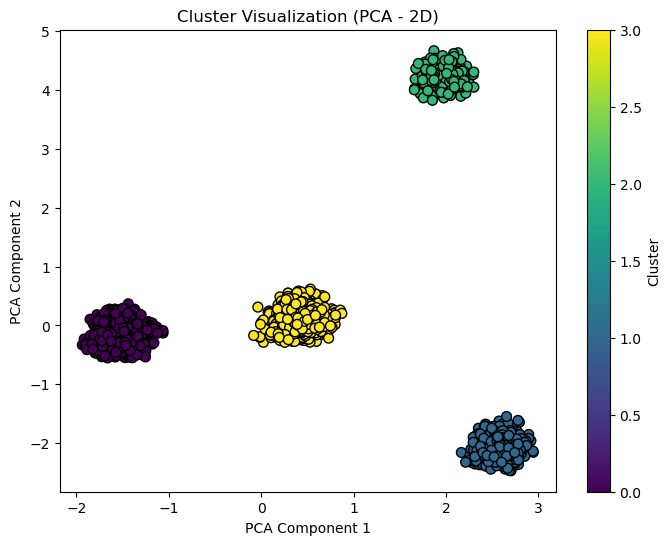

In [72]:
%matplotlib inline
from sklearn.decomposition import PCA

# Step 1: Reduce to 2 dimensions using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)  # X_scaled is your normalized data

# Step 2: Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('Cluster Visualization (PCA - 2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

### 3d visualization of Clusters

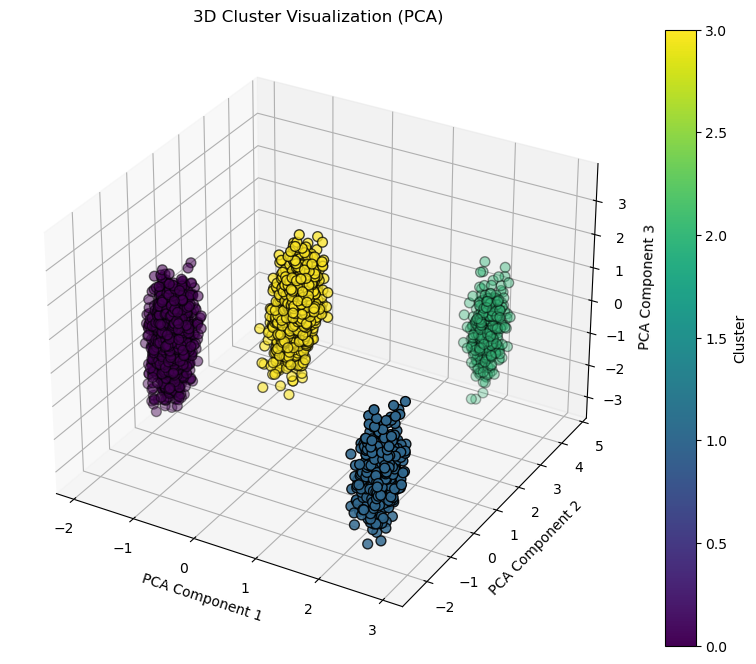

In [70]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# Step 1: Reduce the features to 3 components using PCA
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)  # X_scaled is your normalized data

# Step 2: Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the clusters in 3D space
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], 
                     c=df['Cluster'], cmap='viridis', s=50, edgecolor='k')

# Add axis labels and title
ax.set_title('3D Cluster Visualization (PCA)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

# Add a color bar to indicate clusters
legend = fig.colorbar(scatter, ax=ax, label='Cluster')

plt.show()


In [73]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Season,Review Rating,Subscription Status,Previous Purchases,Frequency of Purchases,Age Group,Spending Category,Gender_encoded,Age Group_encoded,Spending Category_encoded,Cluster
0,1,55,Male,Blouse,Clothing,53,Kentucky,Winter,3.1,Yes,14,Fortnightly,Senior,Medium,1,1,2,0
1,2,19,Male,Sweater,Clothing,64,Maine,Winter,3.1,Yes,2,Fortnightly,Young,Medium,1,3,2,0
2,3,50,Male,Jeans,Clothing,73,Massachusetts,Spring,3.1,Yes,23,Weekly,Adult,High,1,0,0,0
3,4,21,Male,Sandals,Footwear,90,Rhode Island,Spring,3.5,Yes,49,Weekly,Young,High,1,3,0,1
4,5,45,Male,Blouse,Clothing,49,Oregon,Spring,2.7,Yes,31,Annually,Adult,Medium,1,0,2,0


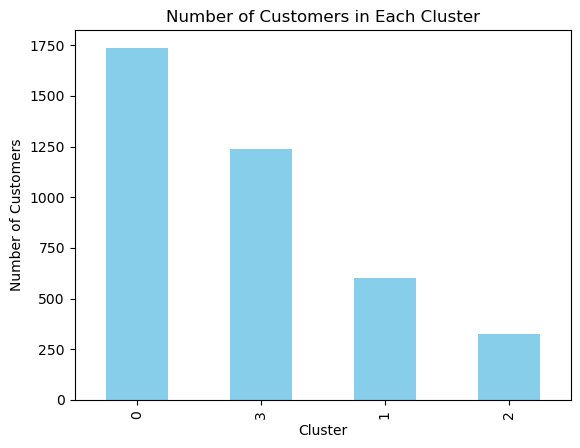

In [100]:
# Bar chart for cluster sizes
cluster_sizes = df['Cluster'].value_counts()
cluster_sizes.plot(kind='bar', color='skyblue')
plt.title('Number of Customers in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()


In [94]:
# Separate numeric and categorical columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include=['object','category']).columns

# Calculate mean for numeric columns
numeric_summary = df.groupby('Cluster')[numeric_columns].mean()

# Calculate mode for categorical columns
categorical_summary = df.groupby('Cluster')[categorical_columns].agg(lambda x: x.mode()[0])

# Combine the summaries
cluster_summary = pd.concat([numeric_summary, categorical_summary], axis=1)

print(cluster_summary)


         Customer ID        Age  Purchase Amount (USD)  Review Rating  \
Cluster                                                                 
0        1958.939551  43.782959              60.025331       3.723143   
1        1959.759599  44.442404              60.255426       3.790651   
2        1907.265432  44.311728              57.172840       3.746914   
3        1945.501613  44.224194              59.838710       3.768629   

         Previous Purchases Gender Item Purchased     Category      Location  \
Cluster                                                                        
0                 25.199194   Male         Blouse     Clothing    California   
1                 25.232053   Male        Sandals     Footwear          Ohio   
2                 24.956790   Male         Jacket    Outerwear  North Dakota   
3                 25.725806   Male        Jewelry  Accessories      Nebraska   

         Season Subscription Status Frequency of Purchases Age Group  \
Cluster 

**Based on our models evaluation we determined 4 differentiable segments which can be profiled as follows:-**
- **Segment 1**: These are middle-aged, senior male customers who purchase clothes (specifically blouses) and shop quarterly with medium spending.
- **Segment 2**: These are senior male customers with regular, fortnightly purchases, often buying footwear (sandals) and leaving relatively good reviews.
- **Segment 3**: Senior male customers, typically from North Dakota, who purchase jackets and make medium-spending fortnightly purchases.
- **Segment 4**: Adult (not seniors) male customers, focused on purchasing jewelry, who shop quarterly with a medium spending category.

**OVERALL SEGMENT INSIGHTS**
- All clusters have *medium spending categories*.
- Customers are predominantly *male* and *senior-aged*.
- The main differentiators are the *items purchased, location*, and *purchase frequency*.

*BASED ON THESE RESULTS*

we can tailor marketing efforts such as promoting specific products or offering seasonal discounts based on the clusters’ behaviors.